## importing datacleaning Libraries


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## Imporitng data 


In [52]:

def read_data(link):
    Data=pd.read_csv(link,index_col=0)
    Data.drop_duplicates(inplace=True)
    return Data
Data=read_data("/home/learner/Desktop/ImmoLiza_reg/Regression_Hussain/Data/Final_cleaned_Data.csv")

In [53]:
Data

,Id,Locality,Type,SubType,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,...,Garden_Area,Land_Surface,State,Facades,Swim_pool,Muniplicity,Region,Surface_total,X,Y
0,20316087,Ertvelde,House,house,329000,2,123,1,0,0,...,0,142,1,3,0,Oost-Vlaanderen,Flanders,0,51.120406,3.707520
1,20316069,Hornu,House,house,180000,3,138,0,0,0,...,1,140,3,2,1,Henegouwen,Wallonia,278,50.423926,3.820832
2,20316048,Beersel,House,house,369000,6,230,0,0,0,...,0,230,5,3,1,Vlaams-Brabant,Flanders,460,50.766251,4.312619
3,20316039,Geraardsbergen,House,house,145000,2,80,1,0,0,...,0,80,1,2,0,Oost-Vlaanderen,Flanders,160,50.820984,3.886864
4,20316038,Geraardsbergen,House,house,269000,3,155,1,0,0,...,170,345,1,2,0,Oost-Vlaanderen,Flanders,500,50.820984,3.886864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,8972064,Blankenberge,Apartment,apartment,324146,2,82,0,0,0,...,0,89,1,0,0,West-Vlaanderen,Flanders,171,51.298379,3.141601
10680,8945382,Knokke,Apartment,duplex,699000,4,129,0,0,0,...,0,129,3,0,0,West-Vlaanderen,Flanders,258,51.346652,3.331958
10681,8746466,Knokke,Apartment,apartment,950000,2,157,0,0,0,...,0,157,3,2,0,West-Vlaanderen,Flanders,314,51.346652,3.331958
10682,8498727,Ingelmunster,Apartment,apartment,562500,3,190,0,0,0,...,0,190,1,0,0,West-Vlaanderen,Flanders,380,50.921458,3.260685


#### Nothing empty 

In [54]:
Data.isnull().sum()


Id                    0
Locality              0
Type                  0
SubType               0
Price                 0
Bedrooms              0
Living_Area           0
Is_Equiped_Kitchen    0
Is_Furnished          0
Is_Open_Fire          0
Terrace               0
Terrace_Area          0
Garden                0
Garden_Area           0
Land_Surface          0
State                 0
Facades               0
Swim_pool             0
Muniplicity           0
Region                0
Surface_total         0
X                     0
Y                     0
dtype: int64

In [55]:
def Data_exploration(Data):
    numerical_data =Data.select_dtypes(include=[float, int])
    # Calculate the correlation matrix
    correlation_matrix = numerical_data.corr()
    print(correlation_matrix.Price)
    sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm', fmt='.2f')
    plt.show()

  
    return




Id                    0.031021
Price                 1.000000
Bedrooms              0.354158
Living_Area           0.469745
Is_Equiped_Kitchen    0.057359
Is_Furnished         -0.024984
Is_Open_Fire          0.088585
Terrace               0.111909
Terrace_Area          0.163179
Garden                0.052013
Garden_Area           0.099540
Land_Surface          0.170649
State                -0.016617
Facades               0.100192
Swim_pool             0.103847
Surface_total         0.227207
X                     0.178599
Y                    -0.078915
Name: Price, dtype: float64


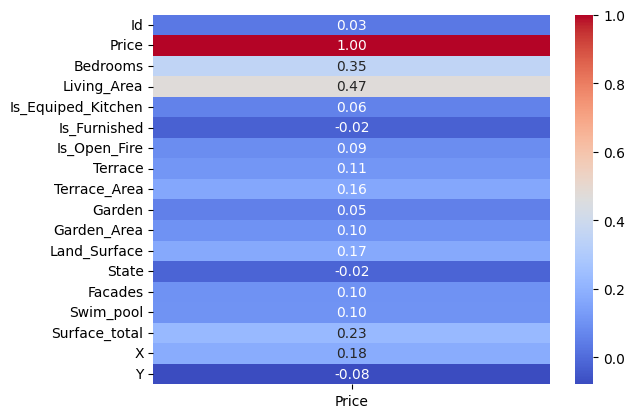

In [56]:
Data_exploration(Data)

## Qualitative (Categorical) Variables:
These variables represent categories or groups:
- Locality (object)
- Type (object)
- SubType (object)
- Sale_Type (object)
- State (object)
- Munplicity (object)
- Region (object)

## Quantitative (Numeric) Variables:

#### These variables represent measurable quantities:
- Price (int64)
- Bedrooms (int64)
- Living_Area (int64)
- Terrace_Area (int64)
- Garden_Area (int64)
- Land_Surface (int64)
- Surface of the plot (int64)
- Facades (int64)
- X(float64)
- Y (float64)

### Boolean Variables:
These are variables that can take two possible values (True or False), and they are stored as integers (0 or 1):

- Is_Equiped_Kitchen (int64)
- Is_Furnished (int64)
- Is_Open_Fire (int64)
- Terrace (int64)
- Garden (int64)
- Swim_pool (int64)

### enCoding

In [57]:
non_numerical_df = Data.select_dtypes(include=['object'])
non_numerical_df.columns

Index(['Locality', 'Type', 'SubType', 'Muniplicity', 'Region'], dtype='object')

In [58]:
def encoding (Data):

    df1=Data
    # Initialize the label encoder(each locality to integer)
    label_encoder = LabelEncoder()

    # Encode the 'Locality' column
    df1['Locality_encoded'] = label_encoder.fit_transform(df1['Locality'])
    
    
    
    condition_mapping = {
    'Good': 1,
    'Not Known': 2,
    'As new': 3,
    'To renovate': 4,
    'To be done up': 5,
    'Just renovated': 6,
    'To restore': 7
}
    # Alerady done so 

 





    # Binary encoding for Type
    df1['Type_encoded'] = df1['Type'].map({'Apartment': 0, 'House': 1})

    # Label encoding 'SubType' using pandas' factorize method
    df1['SubType_encoded'] = pd.factorize(df1['SubType'])[0]
     #Label encoding 'Muniplcitiy' using pandas' factorize method
    df1['Prov_encoded'] = pd.factorize(df1['Muniplicity'])[0]

    # Label encoding 'Region' using pandas' factorize method
    df1['Region_encoded'] = pd.factorize(df1['Region'])[0]
    df1.drop(['Locality', 'Type', 'SubType', 'Muniplicity', 'Region'], axis=1, inplace=True)
    return df1



In [59]:
Encoded_Data= encoding(Data)
Encoded_Data

,Id,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,Terrace,Terrace_Area,Garden,...,Facades,Swim_pool,Surface_total,X,Y,Locality_encoded,Type_encoded,SubType_encoded,Prov_encoded,Region_encoded
0,20316087,329000,2,123,1,0,0,1,0,0,...,3,0,0,51.120406,3.707520,358,1,0,0,0
1,20316069,180000,3,138,0,0,0,1,1,1,...,2,1,278,50.423926,3.820832,492,1,0,1,1
2,20316048,369000,6,230,0,0,0,1,0,0,...,3,1,460,50.766251,4.312619,126,1,0,2,0
3,20316039,145000,2,80,1,0,0,0,0,0,...,2,0,160,50.820984,3.886864,403,1,0,0,0
4,20316038,269000,3,155,1,0,0,1,20,1,...,2,0,500,50.820984,3.886864,403,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,8972064,324146,2,82,0,0,0,1,7,0,...,0,0,171,51.298379,3.141601,180,0,3,5,0
10680,8945382,699000,4,129,0,0,0,1,0,0,...,0,0,258,51.346652,3.331958,535,0,6,5,0
10681,8746466,950000,2,157,0,0,0,0,0,0,...,2,0,314,51.346652,3.331958,535,0,3,5,0
10682,8498727,562500,3,190,0,0,0,1,0,0,...,0,0,380,50.921458,3.260685,509,0,3,5,0


In [60]:
numerical_data = Encoded_Data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix.Price


Id                    0.031021
Price                 1.000000
Bedrooms              0.354158
Living_Area           0.469745
Is_Equiped_Kitchen    0.057359
Is_Furnished         -0.024984
Is_Open_Fire          0.088585
Terrace               0.111909
Terrace_Area          0.163179
Garden                0.052013
Garden_Area           0.099540
Land_Surface          0.170649
State                -0.016617
Facades               0.100192
Swim_pool             0.103847
Surface_total         0.227207
X                     0.178599
Y                    -0.078915
Locality_encoded      0.154906
Type_encoded          0.075502
SubType_encoded       0.076986
Prov_encoded         -0.056789
Region_encoded        0.065164
Name: Price, dtype: float64

# All Data is encoded !

Extract important features 

Id                    0.031021
Price                 1.000000
Bedrooms              0.354158
Living_Area           0.469745
Is_Equiped_Kitchen    0.057359
Is_Furnished         -0.024984
Is_Open_Fire          0.088585
Terrace               0.111909
Terrace_Area          0.163179
Garden                0.052013
Garden_Area           0.099540
Land_Surface          0.170649
State                -0.016617
Facades               0.100192
Swim_pool             0.103847
Surface_total         0.227207
X                     0.178599
Y                    -0.078915
Locality_encoded      0.154906
Type_encoded          0.075502
SubType_encoded       0.076986
Prov_encoded         -0.056789
Region_encoded        0.065164
Name: Price, dtype: float64


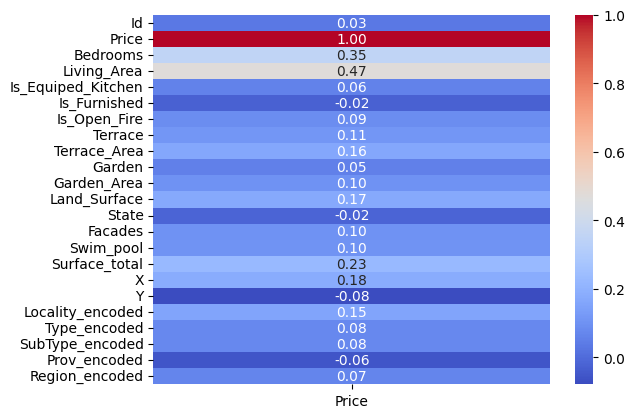

In [61]:
Data_exploration(Encoded_Data)

# Feature Slection


In [62]:
correlation_matrix=Encoded_Data.corr()

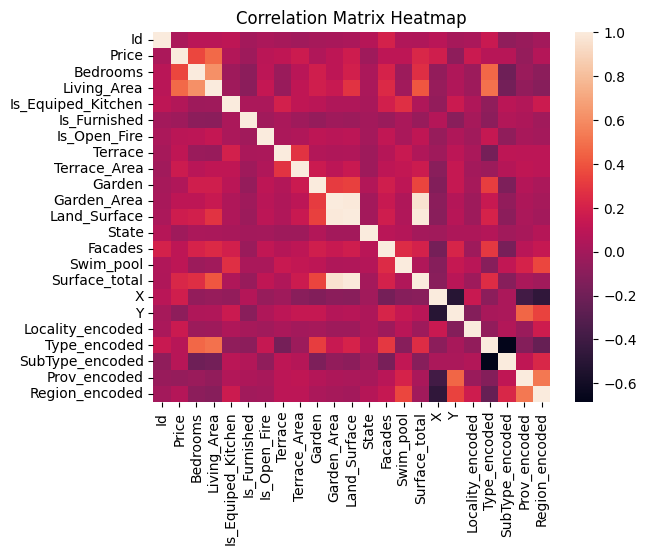

In [63]:
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix Heatmap')



# Show the plot (optional)
plt.show()

## I will discrad following features:
### [IS_frunished, Terras_Area, Graden_Area,X,Y,Land_surfcae,surface_Total ,Is_Open_Fire,Swim_pool ] 

In [64]:
# List of features to discard
features_to_discard = ['Is_Furnished', 'Terrace_Area', 'Garden_Area', 'X', 'Y',"Land_Surface","Surface_total","Is_Open_Fire","Swim_pool"]

# Drop the features from the DataFrame
Encoded_Data = Encoded_Data.drop(columns=features_to_discard)

# Check the updated DataFrame
print(Encoded_Data.head())

         Id   Price  Bedrooms  Living_Area  Is_Equiped_Kitchen  Terrace  \
0  20316087  329000         2          123                   1        1   
1  20316069  180000         3          138                   0        1   
2  20316048  369000         6          230                   0        1   
3  20316039  145000         2           80                   1        0   
4  20316038  269000         3          155                   1        1   

   Garden  State  Facades  Locality_encoded  Type_encoded  SubType_encoded  \
0       0      1        3               358             1                0   
1       1      3        2               492             1                0   
2       0      5        3               126             1                0   
3       0      1        2               403             1                0   
4       1      1        2               403             1                0   

   Prov_encoded  Region_encoded  
0             0               0  
1           

### Selected columns
    - Id
    - Price
    - Bedrooms
    - Living_Area
    - Is_Equiped_Kitchen
    - Terrace
    - Garden
    - State
    - Facades
    - Locality_encoded
    - Type_encoded
    - SubType_encoded
    - Region_encoded
    -Prov_encoded

In [65]:
Encoded_Data.to_csv("Data_Engineering.csv")

## Features importance


In [66]:
X,y= Encoded_Data.drop(columns=['Price']),Encoded_Data["Price"]
model = CatBoostRegressor()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)
print(rfe.support_)

Learning rate set to 0.059528
0:	learn: 178350.1123277	total: 1.78ms	remaining: 1.77s
1:	learn: 174567.8196198	total: 3.39ms	remaining: 1.69s
2:	learn: 171021.0590721	total: 5.07ms	remaining: 1.69s
3:	learn: 167831.6185174	total: 7.12ms	remaining: 1.77s
4:	learn: 164796.8297800	total: 8.99ms	remaining: 1.79s
5:	learn: 161955.6906417	total: 10.7ms	remaining: 1.76s
6:	learn: 159301.1454606	total: 12.9ms	remaining: 1.83s
7:	learn: 157021.0492380	total: 14.7ms	remaining: 1.82s
8:	learn: 154799.0376124	total: 16.6ms	remaining: 1.82s
9:	learn: 152865.5595568	total: 18.4ms	remaining: 1.82s
10:	learn: 150967.4469957	total: 20.7ms	remaining: 1.86s
11:	learn: 149095.9095671	total: 22.1ms	remaining: 1.82s
12:	learn: 147475.6495747	total: 23.5ms	remaining: 1.79s
13:	learn: 146010.3479049	total: 25.4ms	remaining: 1.79s
14:	learn: 144490.6911505	total: 27.7ms	remaining: 1.82s
15:	learn: 143226.0757322	total: 29.1ms	remaining: 1.79s
16:	learn: 141940.0535983	total: 30.7ms	remaining: 1.78s
17:	learn: 

# Feauture engineering 


I will try to exract about five new features from my data

In [102]:
DF = pd.read_csv("/home/learner/Desktop/ImmoLiza_reg/Regression_Hussain/Data_Engineering.csv", index_col=0)

In [103]:
DF

,Id,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Terrace,Garden,State,Facades,Locality_encoded,Type_encoded,SubType_encoded,Prov_encoded,Region_encoded
0,20316087,329000,2,123,1,1,0,1,3,358,1,0,0,0
1,20316069,180000,3,138,0,1,1,3,2,492,1,0,1,1
2,20316048,369000,6,230,0,1,0,5,3,126,1,0,2,0
3,20316039,145000,2,80,1,0,0,1,2,403,1,0,0,0
4,20316038,269000,3,155,1,1,1,1,2,403,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,8972064,324146,2,82,0,1,0,1,0,180,0,3,5,0
10680,8945382,699000,4,129,0,1,0,3,0,535,0,6,5,0
10681,8746466,950000,2,157,0,0,0,3,2,535,0,3,5,0
10682,8498727,562500,3,190,0,1,0,1,0,509,0,3,5,0


In [104]:
# price of squred meter
DF["sqdm_price"]= DF.Price/DF.Living_Area

In [105]:
DF

,Id,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Terrace,Garden,State,Facades,Locality_encoded,Type_encoded,SubType_encoded,Prov_encoded,Region_encoded,sqdm_price
0,20316087,329000,2,123,1,1,0,1,3,358,1,0,0,0,2674.796748
1,20316069,180000,3,138,0,1,1,3,2,492,1,0,1,1,1304.347826
2,20316048,369000,6,230,0,1,0,5,3,126,1,0,2,0,1604.347826
3,20316039,145000,2,80,1,0,0,1,2,403,1,0,0,0,1812.500000
4,20316038,269000,3,155,1,1,1,1,2,403,1,0,0,0,1735.483871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,8972064,324146,2,82,0,1,0,1,0,180,0,3,5,0,3953.000000
10680,8945382,699000,4,129,0,1,0,3,0,535,0,6,5,0,5418.604651
10681,8746466,950000,2,157,0,0,0,3,2,535,0,3,5,0,6050.955414
10682,8498727,562500,3,190,0,1,0,1,0,509,0,3,5,0,2960.526316


In [106]:
# Number of bedrooms per area
DF["Bedrooms_per_area"]= DF.Bedrooms/DF.Living_Area

In [107]:
DF

,Id,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Terrace,Garden,State,Facades,Locality_encoded,Type_encoded,SubType_encoded,Prov_encoded,Region_encoded,sqdm_price,Bedrooms_per_area
0,20316087,329000,2,123,1,1,0,1,3,358,1,0,0,0,2674.796748,0.016260
1,20316069,180000,3,138,0,1,1,3,2,492,1,0,1,1,1304.347826,0.021739
2,20316048,369000,6,230,0,1,0,5,3,126,1,0,2,0,1604.347826,0.026087
3,20316039,145000,2,80,1,0,0,1,2,403,1,0,0,0,1812.500000,0.025000
4,20316038,269000,3,155,1,1,1,1,2,403,1,0,0,0,1735.483871,0.019355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,8972064,324146,2,82,0,1,0,1,0,180,0,3,5,0,3953.000000,0.024390
10680,8945382,699000,4,129,0,1,0,3,0,535,0,6,5,0,5418.604651,0.031008
10681,8746466,950000,2,157,0,0,0,3,2,535,0,3,5,0,6050.955414,0.012739
10682,8498727,562500,3,190,0,1,0,1,0,509,0,3,5,0,2960.526316,0.015789


In [108]:
#mean 'Price' per 'Locality_encoded'
locality_mean_price = DF.groupby('Locality_encoded')['Price'].mean()
DF['Locality_mean_Price'] = DF['Locality_encoded'].map(locality_mean_price)
DF


,Id,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Terrace,Garden,State,Facades,Locality_encoded,Type_encoded,SubType_encoded,Prov_encoded,Region_encoded,sqdm_price,Bedrooms_per_area,Locality_mean_Price
0,20316087,329000,2,123,1,1,0,1,3,358,1,0,0,0,2674.796748,0.016260,323142.461538
1,20316069,180000,3,138,0,1,1,3,2,492,1,0,1,1,1304.347826,0.021739,243851.833333
2,20316048,369000,6,230,0,1,0,5,3,126,1,0,2,0,1604.347826,0.026087,425100.000000
3,20316039,145000,2,80,1,0,0,1,2,403,1,0,0,0,1812.500000,0.025000,308913.551020
4,20316038,269000,3,155,1,1,1,1,2,403,1,0,0,0,1735.483871,0.019355,308913.551020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,8972064,324146,2,82,0,1,0,1,0,180,0,3,5,0,3953.000000,0.024390,311149.338843
10680,8945382,699000,4,129,0,1,0,3,0,535,0,6,5,0,5418.604651,0.031008,688026.363636
10681,8746466,950000,2,157,0,0,0,3,2,535,0,3,5,0,6050.955414,0.012739,688026.363636
10682,8498727,562500,3,190,0,1,0,1,0,509,0,3,5,0,2960.526316,0.015789,284657.727273


In [35]:


Data1=read_data("/home/learner/Desktop/ImmoLiza_reg/Regression_Hussain/Data/Final_cleaned_Data.csv")
Data1

,Id,Locality,Type,SubType,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,...,Garden_Area,Land_Surface,State,Facades,Swim_pool,Muniplicity,Region,Surface_total,X,Y
0,20316087,Ertvelde,House,house,329000,2,123,1,0,0,...,0,142,1,3,0,Oost-Vlaanderen,Flanders,0,51.120406,3.707520
1,20316069,Hornu,House,house,180000,3,138,0,0,0,...,1,140,3,2,1,Henegouwen,Wallonia,278,50.423926,3.820832
2,20316048,Beersel,House,house,369000,6,230,0,0,0,...,0,230,5,3,1,Vlaams-Brabant,Flanders,460,50.766251,4.312619
3,20316039,Geraardsbergen,House,house,145000,2,80,1,0,0,...,0,80,1,2,0,Oost-Vlaanderen,Flanders,160,50.820984,3.886864
4,20316038,Geraardsbergen,House,house,269000,3,155,1,0,0,...,170,345,1,2,0,Oost-Vlaanderen,Flanders,500,50.820984,3.886864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,8972064,Blankenberge,Apartment,apartment,324146,2,82,0,0,0,...,0,89,1,0,0,West-Vlaanderen,Flanders,171,51.298379,3.141601
10680,8945382,Knokke,Apartment,duplex,699000,4,129,0,0,0,...,0,129,3,0,0,West-Vlaanderen,Flanders,258,51.346652,3.331958
10681,8746466,Knokke,Apartment,apartment,950000,2,157,0,0,0,...,0,157,3,2,0,West-Vlaanderen,Flanders,314,51.346652,3.331958
10682,8498727,Ingelmunster,Apartment,apartment,562500,3,190,0,0,0,...,0,190,1,0,0,West-Vlaanderen,Flanders,380,50.921458,3.260685


## Is the property in a Locality on the coast?

In [74]:
# Define the list of coastal municipalities in Belgium
coastal_municipalities = [
    'De Panne', 'Koksijde', 'Nieuwpoort', 'Middelkerke', 
    'Oostende', 'Bredene', 'De Haan', 'Blankenberge', 
    'Zeebrugge', 'Knokke-Heist'
]

# Add a new column 'Is_On_Coast' based on the municipality
Data1['Is_On_Coast'] = Data1['Locality'].apply(
    lambda x: 1 if x in coastal_municipalities else 0
)

# Verify the new column
Data1.groupby("Is_On_Coast")['Muniplicity'].value_counts()

Is_On_Coast  Muniplicity    
0            Brussel            1770
             Oost-Vlaanderen    1600
             Antwerpen          1503
             West-Vlaanderen    1319
             Luik                976
             Vlaams-Brabant      746
             Henegouwen          671
             Limburg             484
             Namen               365
             Luxemburg           364
             Waals-Brabant       361
1            West-Vlaanderen     525
Name: count, dtype: int64

In [109]:
# Merge the 'Is_On_Coast' feature from Data1 into DF based on 'Id'
DF = DF.merge(Data1[['Id', 'Is_On_Coast']], on='Id', how='left')

# Verify the updated DataFrame
print(DF.head())

         Id   Price  Bedrooms  Living_Area  Is_Equiped_Kitchen  Terrace  \
0  20316087  329000         2          123                   1        1   
1  20316069  180000         3          138                   0        1   
2  20316048  369000         6          230                   0        1   
3  20316039  145000         2           80                   1        0   
4  20316038  269000         3          155                   1        1   

   Garden  State  Facades  Locality_encoded  Type_encoded  SubType_encoded  \
0       0      1        3               358             1                0   
1       1      3        2               492             1                0   
2       0      5        3               126             1                0   
3       0      1        2               403             1                0   
4       1      1        2               403             1                0   

   Prov_encoded  Region_encoded   sqdm_price  Bedrooms_per_area  \
0            

In [110]:
DF

,Id,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Terrace,Garden,State,Facades,Locality_encoded,Type_encoded,SubType_encoded,Prov_encoded,Region_encoded,sqdm_price,Bedrooms_per_area,Locality_mean_Price,Is_On_Coast
0,20316087,329000,2,123,1,1,0,1,3,358,1,0,0,0,2674.796748,0.016260,323142.461538,0
1,20316069,180000,3,138,0,1,1,3,2,492,1,0,1,1,1304.347826,0.021739,243851.833333,0
2,20316048,369000,6,230,0,1,0,5,3,126,1,0,2,0,1604.347826,0.026087,425100.000000,0
3,20316039,145000,2,80,1,0,0,1,2,403,1,0,0,0,1812.500000,0.025000,308913.551020,0
4,20316038,269000,3,155,1,1,1,1,2,403,1,0,0,0,1735.483871,0.019355,308913.551020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,8972064,324146,2,82,0,1,0,1,0,180,0,3,5,0,3953.000000,0.024390,311149.338843,1
10680,8945382,699000,4,129,0,1,0,3,0,535,0,6,5,0,5418.604651,0.031008,688026.363636,0
10681,8746466,950000,2,157,0,0,0,3,2,535,0,3,5,0,6050.955414,0.012739,688026.363636,0
10682,8498727,562500,3,190,0,1,0,1,0,509,0,3,5,0,2960.526316,0.015789,284657.727273,0


In [81]:
Data1.Muniplicity.unique()

array(['Oost-Vlaanderen', 'Henegouwen', 'Vlaams-Brabant', 'Antwerpen',
       'Limburg', 'West-Vlaanderen', 'Brussel', 'Luxemburg', 'Namen',
       'Waals-Brabant', 'Luik'], dtype=object)

In [90]:
Data1 = Data1.rename(columns={'Muniplicity': 'Province'})

## Adding GDP for each province 

In [94]:


df = pd.DataFrame({
    "Province": [
        "Antwerpen", "Brussel", "Oost-Vlaanderen", "West-Vlaanderen",
        "Vlaams-Brabant", "Henegouwen", "Luik", "Limburg",
        "Waals-Brabant", "Namen", "Luxemburg"
    ],
    "GDP": [
        98_189, 90_459, 62_123, 52_323, 51_731,
        36_940, 34_715, 31_766, 21_155, 14_697, 7_887
    ]
})
# Convert GDP values to integers
df['GDP'] = df['GDP'].astype(int)


In [88]:
df

,Province,GDP in bn. EUR
0,Antwerpen,98189
1,Brussel,90459
2,Oost-Vlaanderen,62123
3,West-Vlaanderen,52323
4,Vlaams-Brabant,51731
5,Henegouwen,36940
6,Luik,34715
7,Limburg,31766
8,Waals-Brabant,21155
9,Namen,14697


In [96]:
Data1.Province.unique()

array(['Oost-Vlaanderen', 'Henegouwen', 'Vlaams-Brabant', 'Antwerpen',
       'Limburg', 'West-Vlaanderen', 'Brussel', 'Luxemburg', 'Namen',
       'Waals-Brabant', 'Luik'], dtype=object)

In [97]:
Data1=pd.merge(Data1,df , on='Province', how='left')

In [98]:
Data1

,Id,Locality,Type,SubType,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,...,State,Facades,Swim_pool,Province,Region,Surface_total,X,Y,Is_On_Coast,GDP
0,20316087,Ertvelde,House,house,329000,2,123,1,0,0,...,1,3,0,Oost-Vlaanderen,Flanders,0,51.120406,3.707520,0,62123
1,20316069,Hornu,House,house,180000,3,138,0,0,0,...,3,2,1,Henegouwen,Wallonia,278,50.423926,3.820832,0,36940
2,20316048,Beersel,House,house,369000,6,230,0,0,0,...,5,3,1,Vlaams-Brabant,Flanders,460,50.766251,4.312619,0,51731
3,20316039,Geraardsbergen,House,house,145000,2,80,1,0,0,...,1,2,0,Oost-Vlaanderen,Flanders,160,50.820984,3.886864,0,62123
4,20316038,Geraardsbergen,House,house,269000,3,155,1,0,0,...,1,2,0,Oost-Vlaanderen,Flanders,500,50.820984,3.886864,0,62123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,8972064,Blankenberge,Apartment,apartment,324146,2,82,0,0,0,...,1,0,0,West-Vlaanderen,Flanders,171,51.298379,3.141601,1,52323
10680,8945382,Knokke,Apartment,duplex,699000,4,129,0,0,0,...,3,0,0,West-Vlaanderen,Flanders,258,51.346652,3.331958,0,52323
10681,8746466,Knokke,Apartment,apartment,950000,2,157,0,0,0,...,3,2,0,West-Vlaanderen,Flanders,314,51.346652,3.331958,0,52323
10682,8498727,Ingelmunster,Apartment,apartment,562500,3,190,0,0,0,...,1,0,0,West-Vlaanderen,Flanders,380,50.921458,3.260685,0,52323


In [111]:
# Merge the 'Is_On_Coast' feature from Data1 into DF based on 'Id'
DF = DF.merge(Data1[['Id', 'GDP']], on='Id', how='left')

# Verify the updated DataFrame
DF.head()

,Id,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Terrace,Garden,State,Facades,Locality_encoded,Type_encoded,SubType_encoded,Prov_encoded,Region_encoded,sqdm_price,Bedrooms_per_area,Locality_mean_Price,Is_On_Coast,GDP
0,20316087,329000,2,123,1,1,0,1,3,358,1,0,0,0,2674.796748,0.016260,323142.461538,0,62123
1,20316069,180000,3,138,0,1,1,3,2,492,1,0,1,1,1304.347826,0.021739,243851.833333,0,36940
2,20316048,369000,6,230,0,1,0,5,3,126,1,0,2,0,1604.347826,0.026087,425100.000000,0,51731
3,20316039,145000,2,80,1,0,0,1,2,403,1,0,0,0,1812.500000,0.025000,308913.551020,0,62123
4,20316038,269000,3,155,1,1,1,1,2,403,1,0,0,0,1735.483871,0.019355,308913.551020,0,62123


## Adding Avg rent Price per Prov

In [119]:
data = { "Province": ["Brussel", "Vlaams-Brabant", "Waals-Brabant", "Antwerpen", "Oost-Vlaanderen", "West-Vlaanderen", "Henegouwen", "Luik", "Luxemburg", "Namen"], "Avg_rent": [1205, 1013, 1013, 1000, 950, 950, 759, 759, 759, 759] } 
# Create 
# DataFrame 

df2 = pd.DataFrame(data)
Data1=pd.merge(Data1,df2 , on='Province', how='left')

In [120]:
Data1

,Id,Locality,Type,SubType,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Is_Furnished,Is_Open_Fire,...,Region,Surface_total,X,Y,Is_On_Coast,GDP,Average Rent (€),Avg_rent_x,Avg_rent_y,Avg_rent
0,20316087,Ertvelde,House,house,329000,2,123,1,0,0,...,Flanders,0,51.120406,3.707520,0,62123,950.0,950.0,950.0,950.0
1,20316069,Hornu,House,house,180000,3,138,0,0,0,...,Wallonia,278,50.423926,3.820832,0,36940,759.0,759.0,759.0,759.0
2,20316048,Beersel,House,house,369000,6,230,0,0,0,...,Flanders,460,50.766251,4.312619,0,51731,1013.0,1013.0,1013.0,1013.0
3,20316039,Geraardsbergen,House,house,145000,2,80,1,0,0,...,Flanders,160,50.820984,3.886864,0,62123,950.0,950.0,950.0,950.0
4,20316038,Geraardsbergen,House,house,269000,3,155,1,0,0,...,Flanders,500,50.820984,3.886864,0,62123,950.0,950.0,950.0,950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,8972064,Blankenberge,Apartment,apartment,324146,2,82,0,0,0,...,Flanders,171,51.298379,3.141601,1,52323,950.0,950.0,950.0,950.0
10680,8945382,Knokke,Apartment,duplex,699000,4,129,0,0,0,...,Flanders,258,51.346652,3.331958,0,52323,950.0,950.0,950.0,950.0
10681,8746466,Knokke,Apartment,apartment,950000,2,157,0,0,0,...,Flanders,314,51.346652,3.331958,0,52323,950.0,950.0,950.0,950.0
10682,8498727,Ingelmunster,Apartment,apartment,562500,3,190,0,0,0,...,Flanders,380,50.921458,3.260685,0,52323,950.0,950.0,950.0,950.0


In [121]:
# Merge the 'Is_On_Coast' feature from Data1 into DF based on 'Id'
DF = DF.merge(Data1[['Id', 'Avg_rent']], on='Id', how='left')

# Verify the updated DataFrame
DF.head()

,Id,Price,Bedrooms,Living_Area,Is_Equiped_Kitchen,Terrace,Garden,State,Facades,Locality_encoded,Type_encoded,SubType_encoded,Prov_encoded,Region_encoded,sqdm_price,Bedrooms_per_area,Locality_mean_Price,Is_On_Coast,GDP,Avg_rent
0,20316087,329000,2,123,1,1,0,1,3,358,1,0,0,0,2674.796748,0.016260,323142.461538,0,62123,950.0
1,20316069,180000,3,138,0,1,1,3,2,492,1,0,1,1,1304.347826,0.021739,243851.833333,0,36940,759.0
2,20316048,369000,6,230,0,1,0,5,3,126,1,0,2,0,1604.347826,0.026087,425100.000000,0,51731,1013.0
3,20316039,145000,2,80,1,0,0,1,2,403,1,0,0,0,1812.500000,0.025000,308913.551020,0,62123,950.0
4,20316038,269000,3,155,1,1,1,1,2,403,1,0,0,0,1735.483871,0.019355,308913.551020,0,62123,950.0


In [122]:
DF.to_csv("Enginnerd_Data.csv")